In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings                   

In [414]:
# Load historical Bitcoin price data 
bitcoin_df = pd.read_csv(r'/Users/Dankosgey/desktop/python/datasets/newbtc.csv',index_col=[0],parse_dates=True).squeeze("columns")
bitcoin_df['End'] = pd.to_datetime(bitcoin_df['End'])
bitcoin_df

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2024-08-22,2024-08-23,61167.4800,61379.4400,59953.1400,60386.0200,1.099260e+11,1.197430e+12
2024-08-21,2024-08-22,59114.4100,61813.1900,58907.0900,61109.9900,1.094570e+11,1.180930e+12
2024-08-20,2024-08-21,59448.0000,61315.9600,58705.6800,59056.0100,1.036200e+11,1.185950e+12
2024-08-19,2024-08-20,58320.0200,59562.7100,57928.8600,59562.7100,9.317886e+10,1.157510e+12
2024-08-18,2024-08-19,59479.0400,60212.2800,58525.9500,58525.9500,8.065593e+10,1.177540e+12
...,...,...,...,...,...,...,...
2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.000000e+00,2.743084e+05
2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.000000e+00,2.567102e+05
2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.000000e+00,2.775702e+05


In [416]:
DF=bitcoin_df
df=bitcoin_df
df.sort_index(inplace=True)
df

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2010-07-17,2010-07-18,0.0500,0.0500,0.0500,0.0500,0.000000e+00,1.708032e+05
2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.000000e+00,2.947466e+05
2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.000000e+00,2.775702e+05
2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.000000e+00,2.567102e+05
2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.000000e+00,2.743084e+05
...,...,...,...,...,...,...,...
2024-08-18,2024-08-19,59479.0400,60212.2800,58525.9500,58525.9500,8.065593e+10,1.177540e+12
2024-08-19,2024-08-20,58320.0200,59562.7100,57928.8600,59562.7100,9.317886e+10,1.157510e+12
2024-08-20,2024-08-21,59448.0000,61315.9600,58705.6800,59056.0100,1.036200e+11,1.185950e+12


In [418]:
# check for missing values
bitcoin_df[pd.isnull(bitcoin_df).any(axis=1)]


,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,


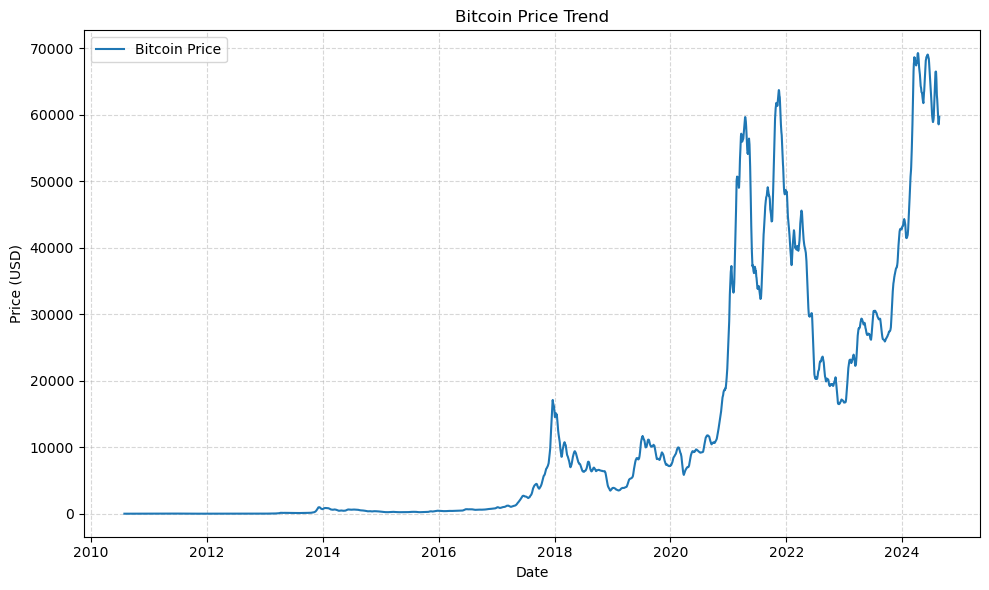

In [420]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Bitcoin price trend (blue line)
ax.plot(df.index, df['Close'].rolling(window=15).mean(), color='tab:blue', label='Bitcoin Price')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title('Bitcoin Price Trend')
ax.legend()

# Show the grid
ax.grid(True, linestyle='--', alpha=0.5)

# Fine-tune layout
plt.tight_layout()

# Display the plot
plt.show()


In [422]:
# Define halving dates (based on historical data)
halving_dates = [
    '2012-11-28',  # 1st halving
    '2016-07-09',  # 2nd halving
    '2020-05-11',  # 3rd halving
    '2024-04-29'   # 4th halving 
]

In [424]:
last_date_index = df.index[-1]
last_date_index

Timestamp('2024-08-22 00:00:00')

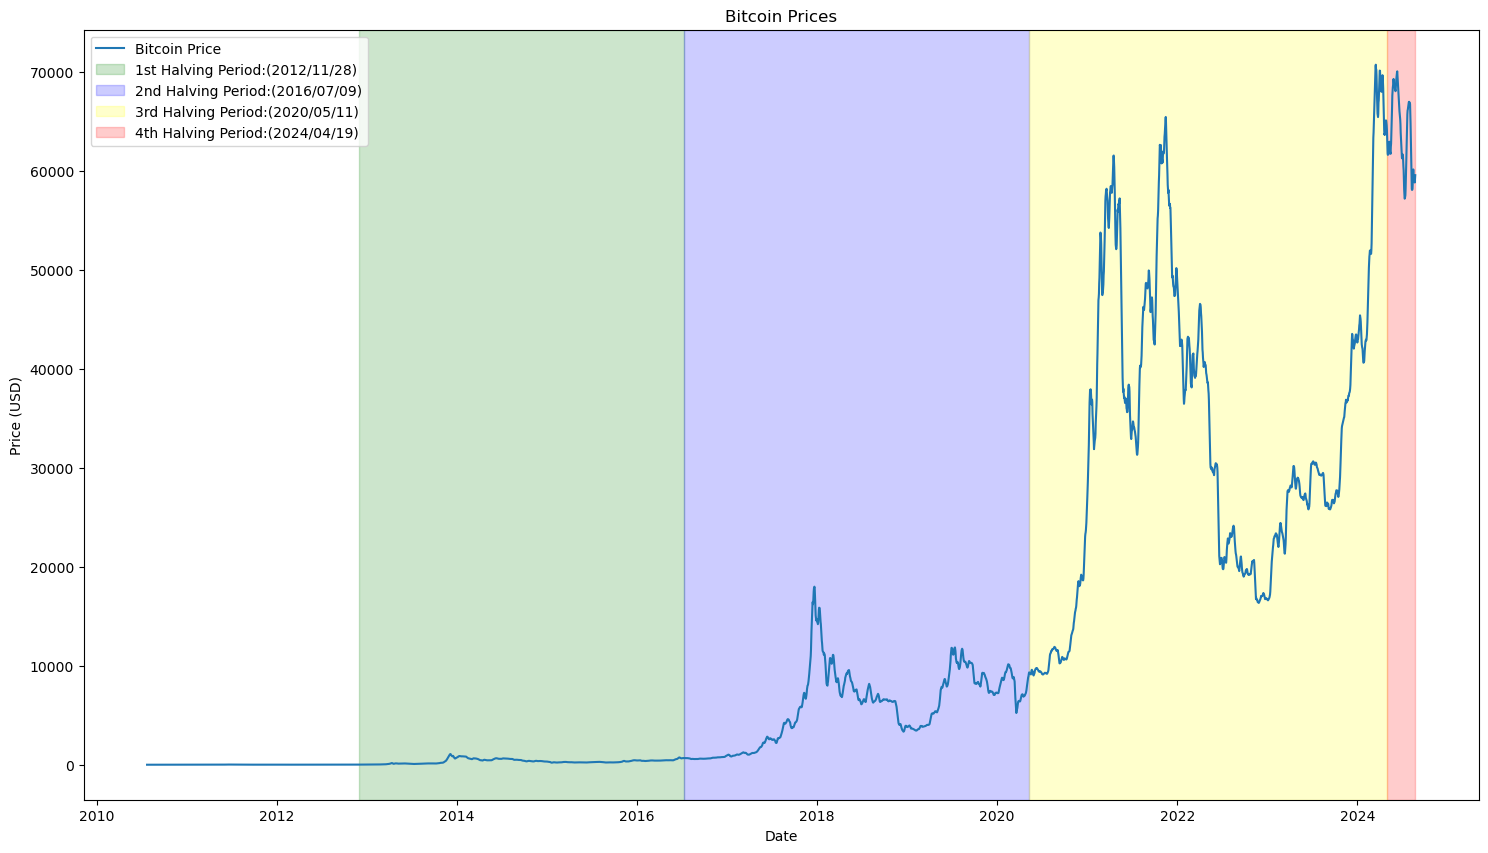

In [426]:
# Plot Bitcoin prices
plt.figure(figsize=(18,10))
plt.plot(bitcoin_df['End'], bitcoin_df['Close'].rolling(window=7).mean(), label='Bitcoin Price', color='tab:blue')
plt.axvspan(halving_dates[0], halving_dates[1], color='green', alpha=0.2, label=r'''1st Halving Period:(2012/11/28)''')
plt.axvspan(halving_dates[1], halving_dates[2], color='blue', alpha=0.2, label=r'''2nd Halving Period:(2016/07/09)''')
plt.axvspan(halving_dates[2], halving_dates[3], color='yellow', alpha=0.2, label=r'''3rd Halving Period:(2020/05/11)''')
plt.axvspan(halving_dates[3], last_date_index, color='red', alpha=0.2, label=r'''4th Halving Period:(2024/04/19)''')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Prices')
plt.legend()
plt.show()


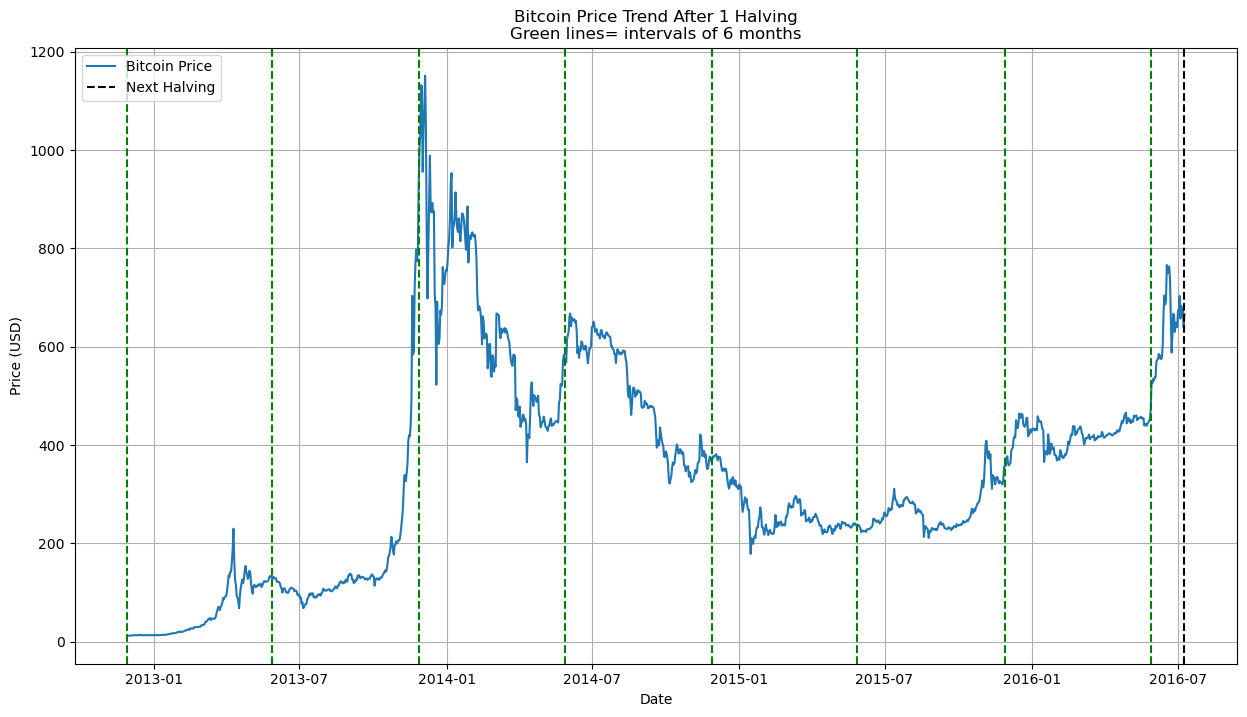

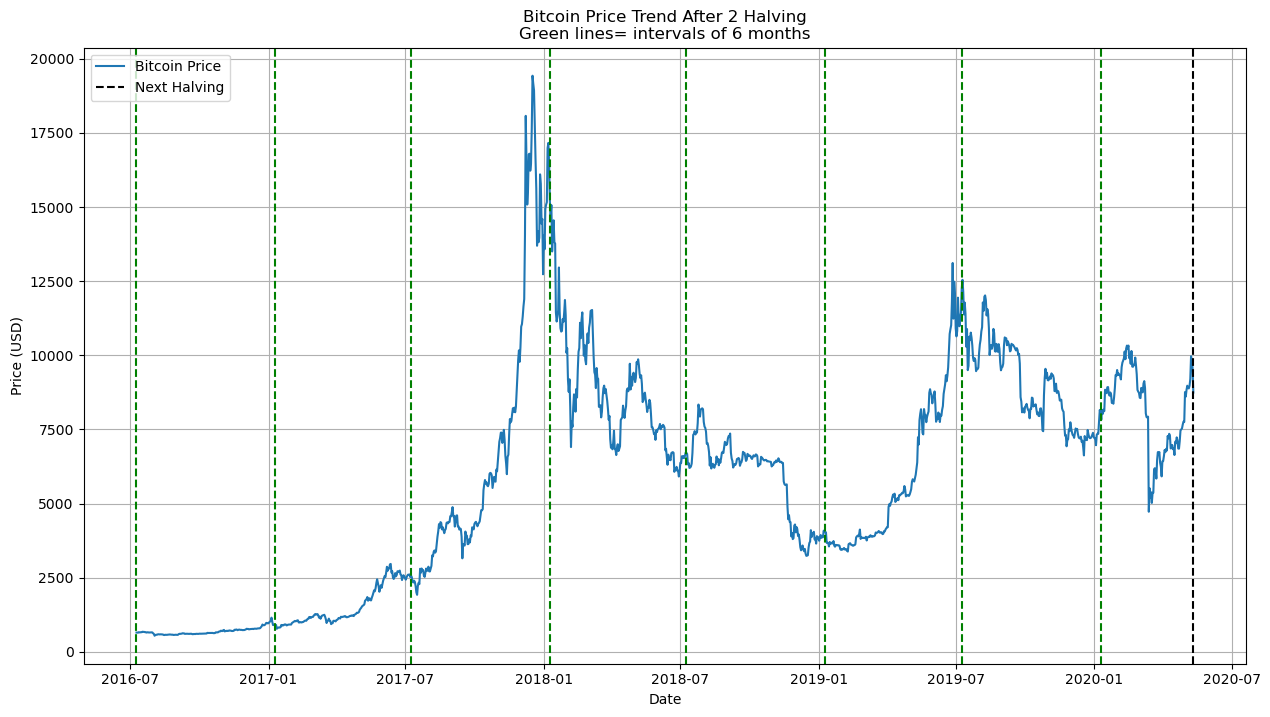

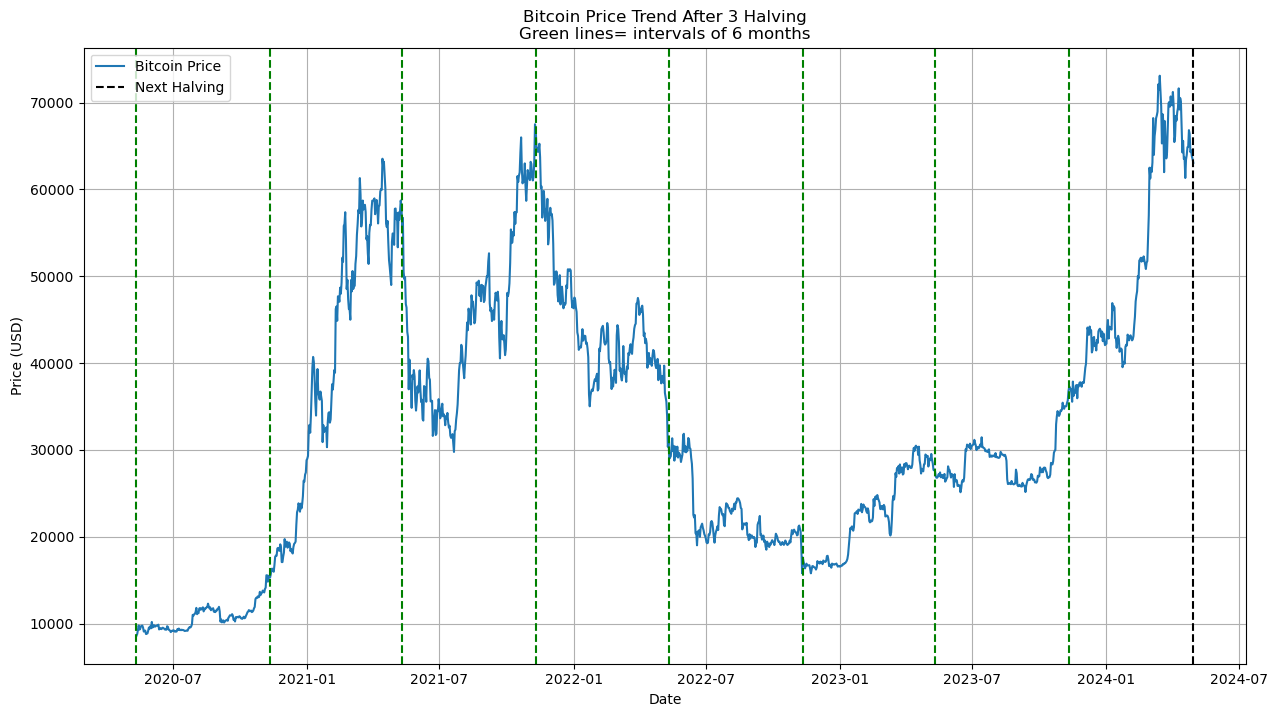

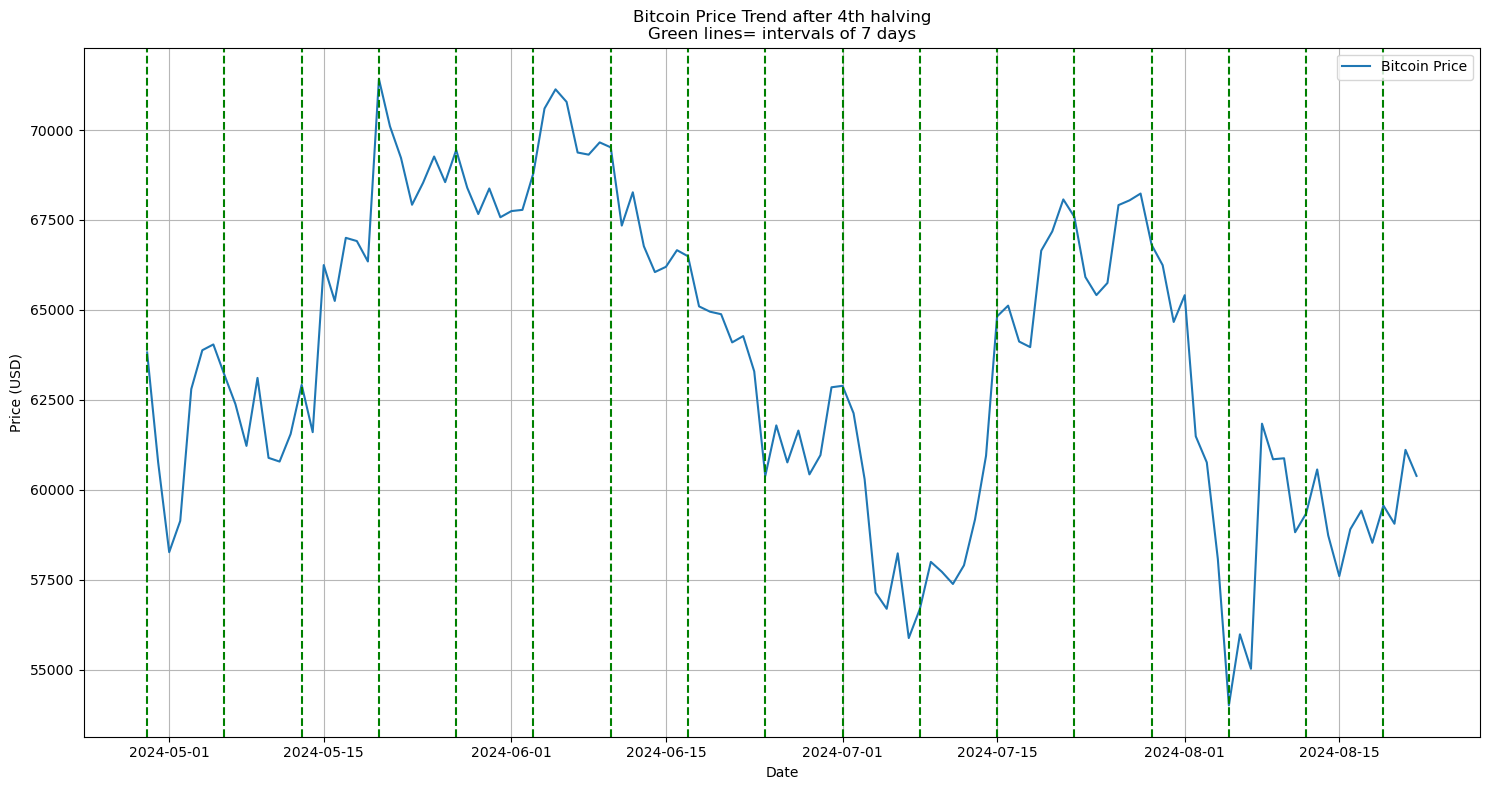

In [464]:
# Convert halving dates to datetime
halving_dates = pd.to_datetime(halving_dates)

for i in range(len(halving_dates)-1):
    # Select data for the period after each halving
    mask = (bitcoin_df['End'] > halving_dates[i]) & (bitcoin_df['End'] <= halving_dates[i+1])
    period_data = bitcoin_df.loc[mask]
    
    # Create a new figure for each period
    plt.figure(figsize=(15,8))
    
    # Plot data for the period after each halving
    plt.plot(period_data['End'], period_data['Close'], color='tab:blue', label='Bitcoin Price')
    
    # Plot vertical lines every 6 months after each halving
    six_months_after_halving = halving_dates[i]
    while six_months_after_halving < halving_dates[i+1]:
        plt.axvline(six_months_after_halving, color='g', linestyle='--')
        MONTHS=6
        six_months_after_halving += pd.DateOffset(months=MONTHS)
    
    plt.axvline(halving_dates[i+1], color='black', linestyle='--', label='Next Halving')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'Bitcoin Price Trend After {i+1} Halving\nGreen lines= intervals of {MONTHS} months')
    plt.legend()
    plt.grid(True)
    plt.show()

start_date = '2024-04-29'
filtered_df = df.loc[start_date:]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the Bitcoin price trend (blue line)
ax.plot(filtered_df.index, filtered_df['Close'], color='tab:blue', label='Bitcoin Price')
DAYS=7
# Add vertical lines every 7 days
seven_days_interval = pd.DateOffset(days=DAYS)
current_date = pd.to_datetime(start_date)  # Convert start_date to timestamp
while current_date < filtered_df.index[-1]:
    plt.axvline(current_date, color='green', linestyle='--')
    current_date += seven_days_interval
    
# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title(f'Bitcoin Price Trend after 4th halving\nGreen lines= intervals of {DAYS} days')
ax.legend()

# Show the grid
ax.grid(True, alpha=0.9)

# Fine-tune layout
plt.tight_layout()
# Display the plot
plt.show()


In [465]:
def find_max_value_dates(df, date_column, value_column, intervals):
    results = []
    for i, (start_date, end_date) in enumerate(intervals, start=1):
        subset = df[(df[date_column] >= start_date) & (df[date_column] <= end_date)]
        max_value_row = subset.loc[subset[value_column].idxmax()]
        max_value_date = max_value_row[date_column]
        max_value = max_value_row[value_column]
        days_to_max_value = (max_value_date - pd.to_datetime(start_date)).days

        # Calculate percentage change
        start_value = subset.iloc[0][value_column]
        percentage_change = ((max_value - start_value) / start_value) * 100

        # Convert days to years, months, and remaining days
        years, remaining_days = divmod(days_to_max_value, 365)
        months, days = divmod(remaining_days, 30)

        # Create a combined time column
        time_parts = [f"{years} years", f"{months} months", f"{days} days"]
        time = " ".join(part for part in time_parts if part != "0 days")

        # Add start and end values to the results
        start_value_interval = subset.iloc[0][value_column]
        end_value_interval = subset.iloc[-1][value_column]

        results.append((i, start_date, start_value_interval, max_value_date, max_value, time,
                        f'{percentage_change:.2f}%', end_value_interval,end_date))

    # Create the DataFrame
    btc_df = pd.DataFrame(results, columns=['Halving', 'Halving Date', 'Initial Price',
                                            'Peak Date', 'Peak Price',
                                            'Time to Peak', 'Percentage Change',
                                            'End Price','End date for the cycle'])
    return btc_df

intervals = [('2012-11-28', '2016-07-08'), ('2016-07-09', '2020-05-10'),
             ('2020-05-11', '2024-04-18'), ('2024-04-19', '2024-06-20')]
btc_df = find_max_value_dates(df, 'End', 'Close', intervals)
btc_df.set_index('Halving', inplace=True)
btc_df

,Halving Date,Initial Price,Peak Date,Peak Price,Time to Peak,Percentage Change,End Price,End date for the cycle
Halving,,,,,,,,
1,2012-11-28,12.200000,2013-12-05,1151.17000,1 years 0 months 7 days,9335.82%,639.667000,2016-07-08
2,2016-07-09,666.707000,2017-12-17,19427.47451,1 years 5 months 11 days,2813.94%,9570.005988,2020-05-10
3,2020-05-11,8745.152545,2024-03-14,73087.95000,3 years 10 months 8 days,735.75%,61309.970000,2024-04-18
4,2024-04-19,63418.000000,2024-05-21,71418.17000,0 years 1 months 2 days,12.61%,64950.060000,2024-06-20


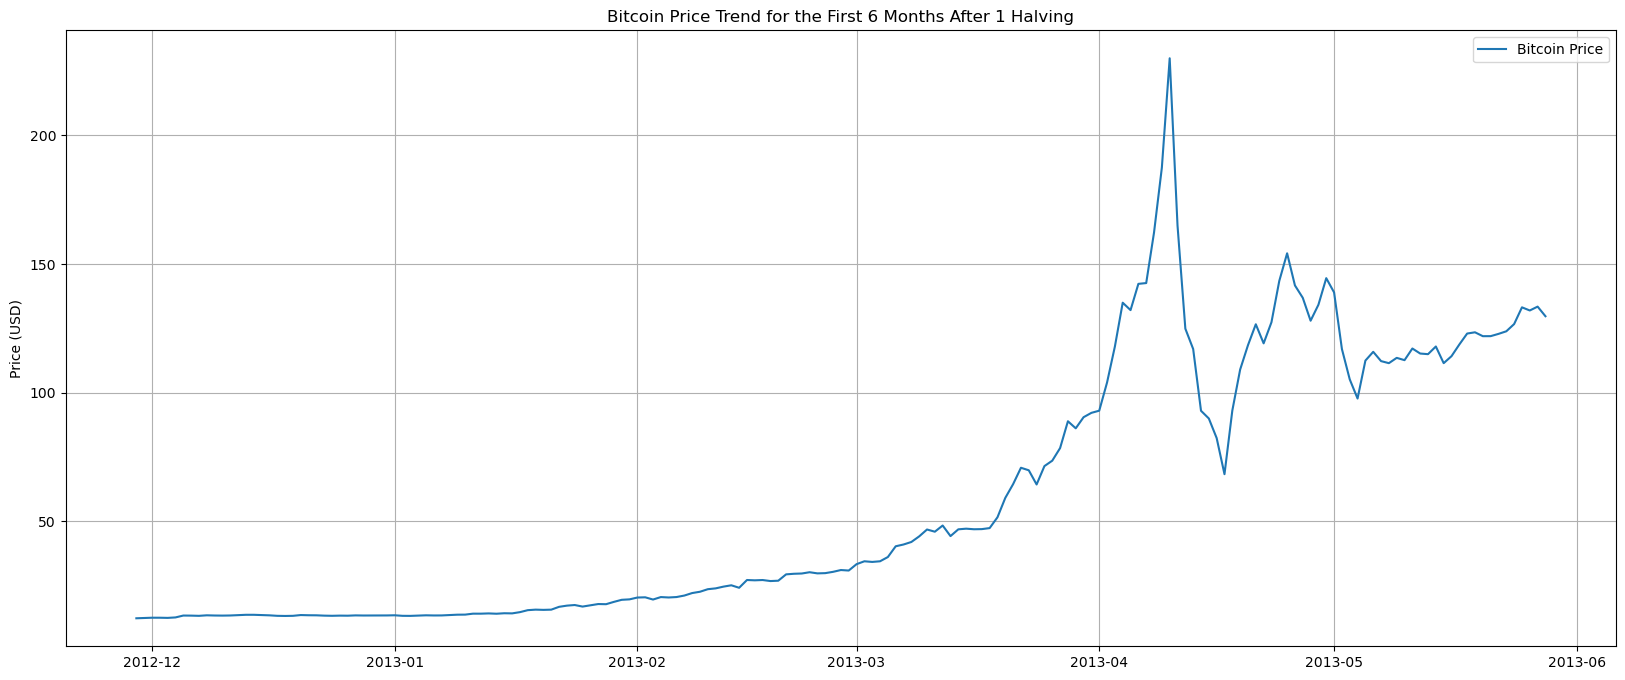

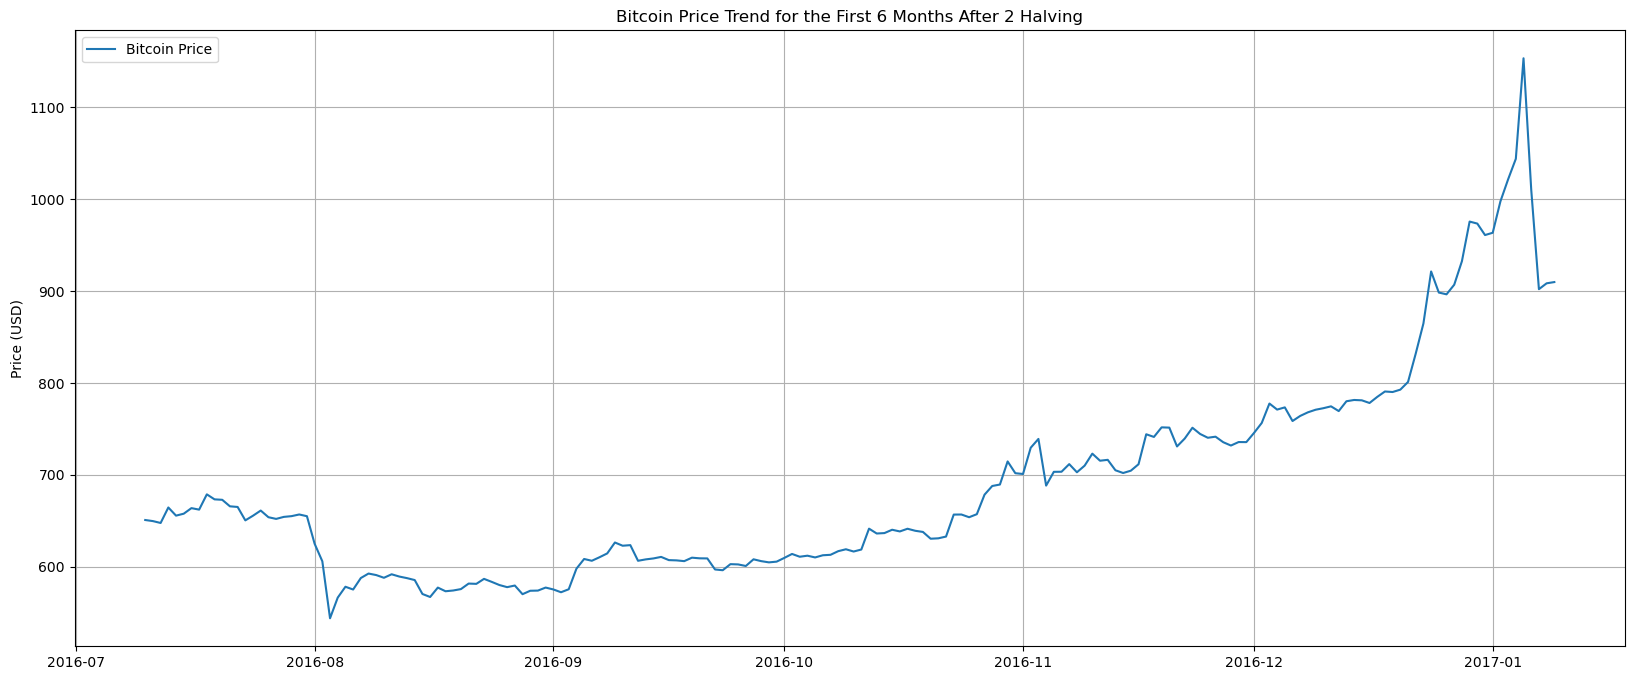

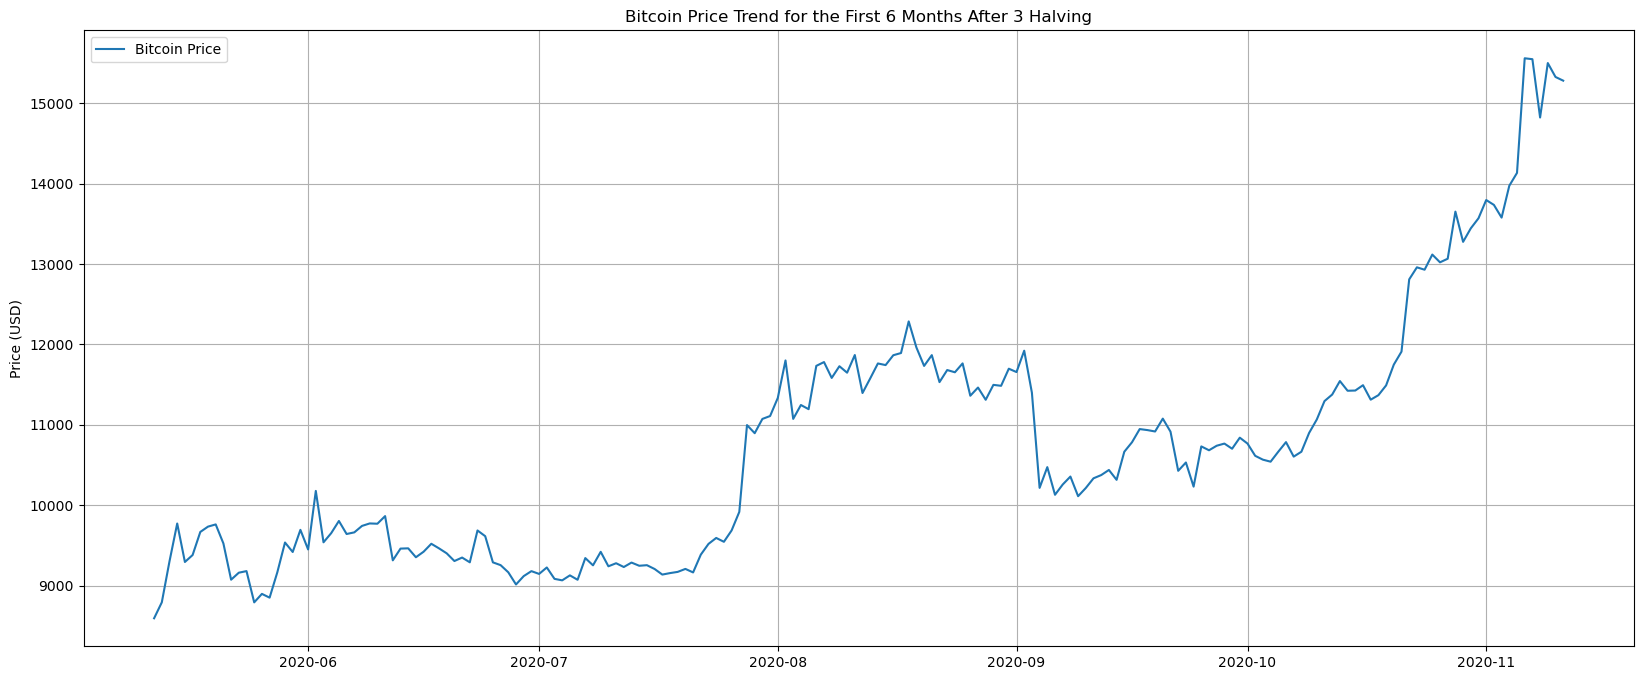

In [466]:
# Convert halving dates to datetime
halving_dates = pd.to_datetime(halving_dates)

for i in range(len(halving_dates)-1):
    # Select data for the 6 months period after each halving
    m_onths=6
    six_months_after_halving = halving_dates[i] + pd.DateOffset(months=m_onths)
    mask = (bitcoin_df['End'] > halving_dates[i]) & (bitcoin_df['End'] <= six_months_after_halving)
    period_data = bitcoin_df.loc[mask]
    
    # Create a new figure for each period
    plt.figure(figsize=(20,8))
    
    # Plot data for the 6 months period after each halving
    plt.plot(period_data['End'], period_data['Close'],color = 'tab:blue',label='Bitcoin Price')

    plt.ylabel('Price (USD)')
    plt.title(f'Bitcoin Price Trend for the First {m_onths} Months After {i+1} Halving')
    plt.legend()
    plt.grid(True)
    plt.show()


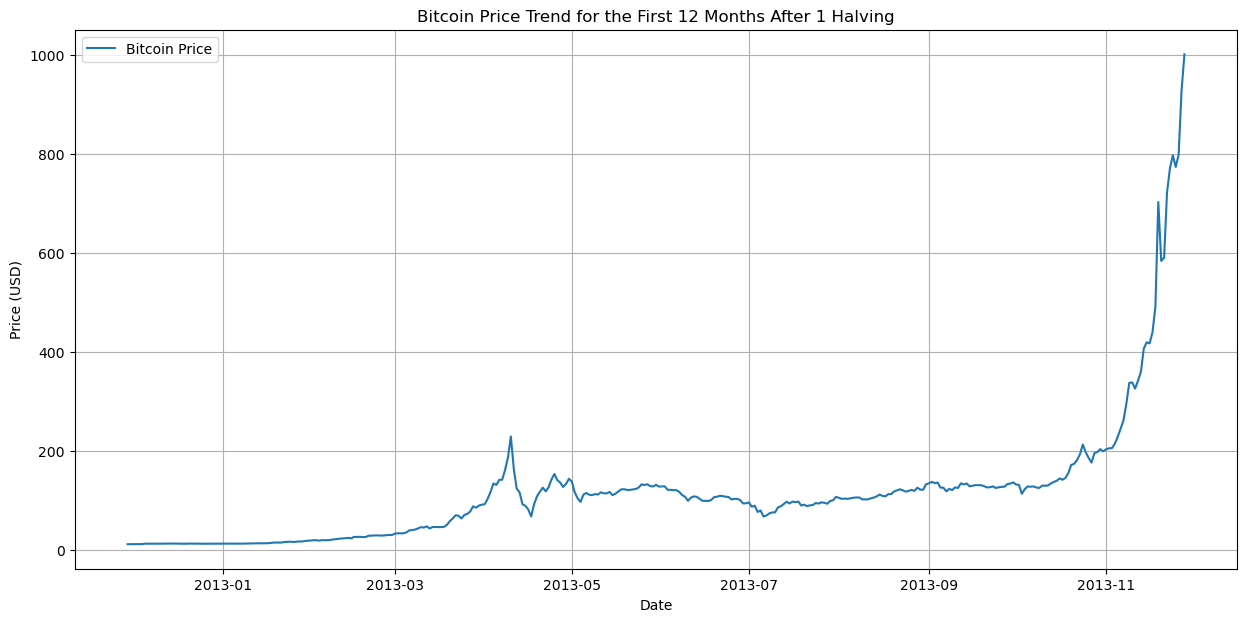

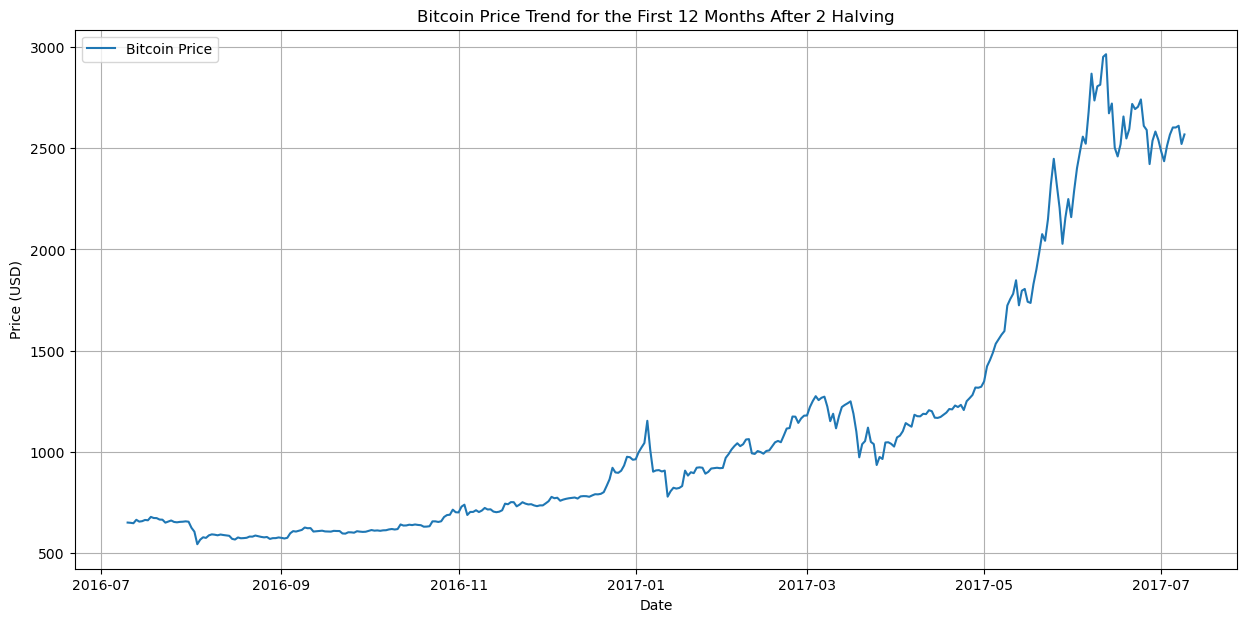

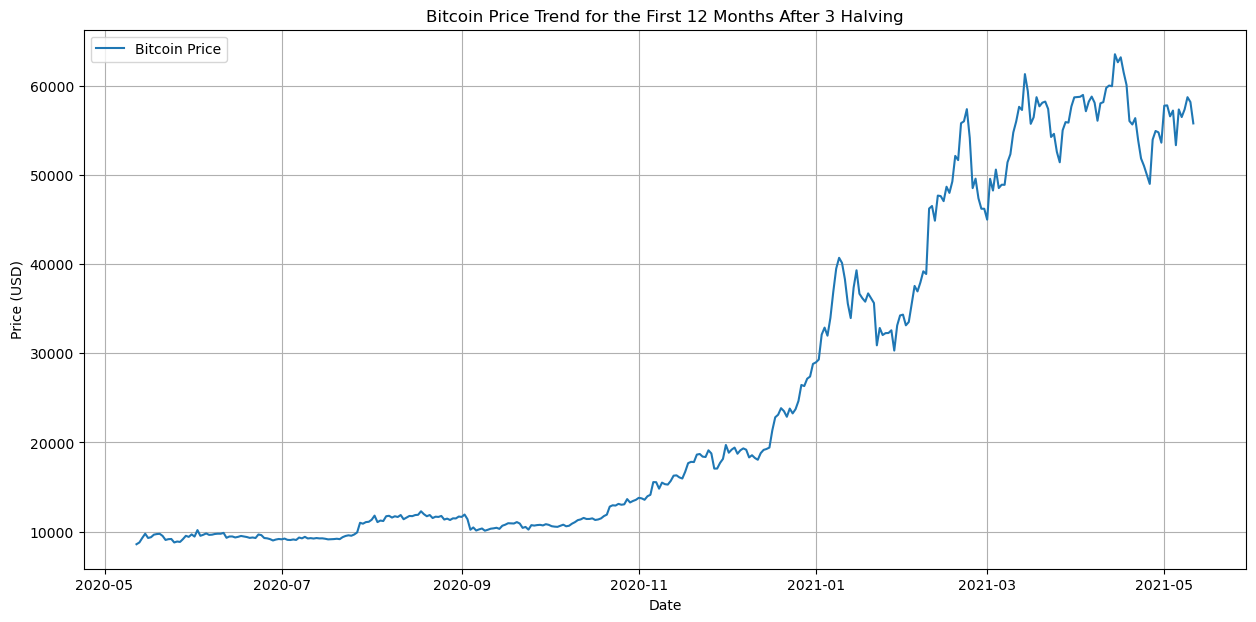

In [575]:
# Convert halving dates to datetime
halving_dates = pd.to_datetime(halving_dates)

for i, halving_date in enumerate(halving_dates[:-1], start=1):
    monthss=12
    months_after_halving = halving_date + pd.DateOffset(months=monthss)
    mask = (bitcoin_df['End'] > halving_date) & (bitcoin_df['End'] <= months_after_halving)
    period_data = bitcoin_df.loc[mask]
    
    # Create a new figure for each period
    fig, ax = plt.subplots(figsize=(15, 7))

    # Plot Bitcoin price during the period
    ax.plot(period_data['End'], period_data['Close'], color='tab:blue', label='Bitcoin Price')

    # Customize plot aesthetics
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'Bitcoin Price Trend for the First {monthss} Months After {i} Halving')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()


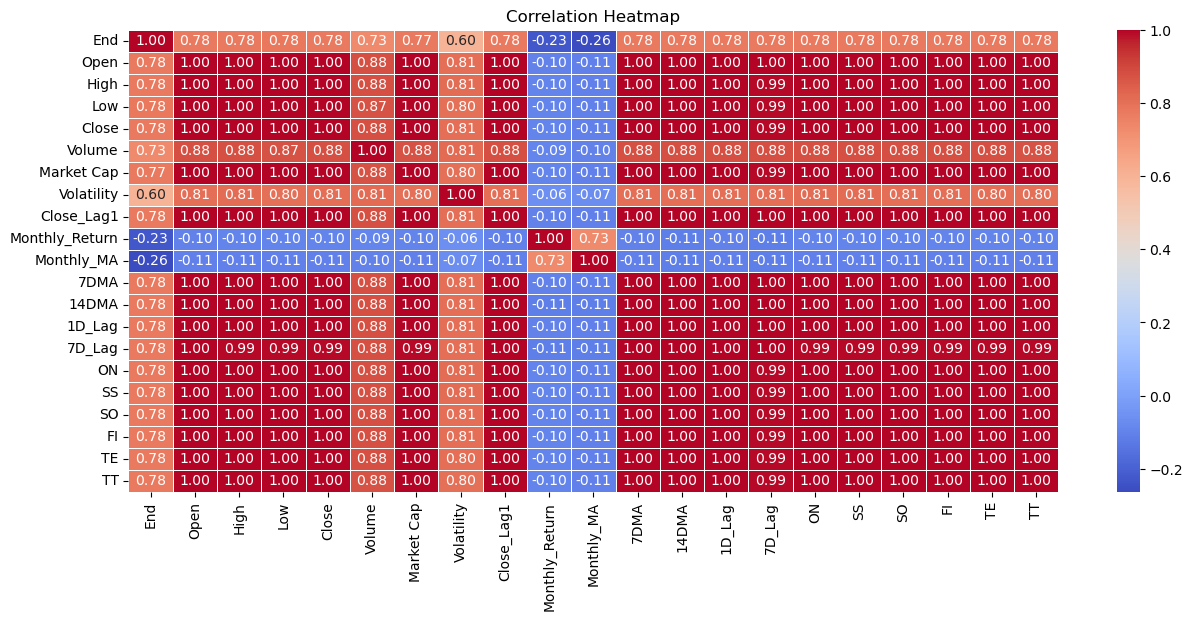

In [469]:
# Advanced correlation heatmap with annotations
corr_matrix = bitcoin_df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [470]:
# Calculate volatility (rolling standard deviation)
bitcoin_df['Volatility'] = bitcoin_df['Close'].rolling(window=30).std()

# Create lagged features (e.g., 1-day, 7-day, and 14-day lags)
bitcoin_df['Close_Lag1'] = bitcoin_df['Close'].shift(1)
# bitcoin_df['Close_Lag7'] = bitcoin_df['Close'].shift(7)
# bitcoin_df['Close_Lag14'] = bitcoin_df['Close'].shift(14)

# Calculate weekly and monthly price change rates
# bitcoin_df['Weekly_Return'] = bitcoin_df['Close'].pct_change(periods=7)
bitcoin_df['Monthly_Return'] = bitcoin_df['Close'].pct_change(periods=30)

# Calculate moving averages
# bitcoin_df['Weekly_MA'] = bitcoin_df['Weekly_Return'].rolling(window=7).mean()
bitcoin_df['Monthly_MA'] = bitcoin_df['Monthly_Return'].rolling(window=30).mean()

# 1. Historical prices (e.g., 7-day moving average, 14-day moving average)
bitcoin_df['7DMA'] = bitcoin_df['Close'].rolling(window=7).mean()
bitcoin_df['14DMA'] = bitcoin_df['Close'].rolling(window=14).mean()
bitcoin_df['1D_Lag'] = bitcoin_df['Close'].shift(1)
bitcoin_df['7D_Lag'] =bitcoin_df['Close'].shift(7)
bitcoin_df['Volatility'] = bitcoin_df['Close'].rolling(window=7).std()

In [471]:
# Calculate Fibonacci retracement levels
def calculate_fibonacci_levels(high, low):
    price_range = high - low
    ON = high
    SS = high - 0.236 * price_range
    SO = high - 0.382 * price_range
    FI = high - 0.50 * price_range
    TE = low + 0.382 * price_range
    TT = low + 0.236 * price_range
    return ON, SS, SO, FI, TE, TT

# Calculate levels for each data point
bitcoin_df['ON'], bitcoin_df['SS'], bitcoin_df['SO'], bitcoin_df['FI'], bitcoin_df['TE'], bitcoin_df['TT'] =\
zip(*bitcoin_df.apply(lambda row: calculate_fibonacci_levels(row['High'], row['Low']), axis=1))


In [472]:
bitcoin_df.iloc[0:1]

,End,Open,High,Low,Close,Volume,Market Cap,Volatility,Close_Lag1,Monthly_Return,...,7DMA,14DMA,1D_Lag,7D_Lag,ON,SS,SO,FI,TE,TT
Start,,,,,,,,,,,,,,,,,,,,,
2010-09-14,2010-09-15,0.062,0.062,0.062,0.062,0.0,246113.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.062,0.062,0.062,0.062,0.062,0.062


In [473]:
bitcoin_df.dropna(inplace=True)

In [474]:
bitcoin_df.iloc[0:1]

,End,Open,High,Low,Close,Volume,Market Cap,Volatility,Close_Lag1,Monthly_Return,...,7DMA,14DMA,1D_Lag,7D_Lag,ON,SS,SO,FI,TE,TT
Start,,,,,,,,,,,,,,,,,,,,,
2010-11-12,2010-11-13,0.2682,0.2682,0.2682,0.2682,0.0,1222556.175,0.066643,0.2231,1.554286,...,0.273471,0.241293,0.2231,0.26,0.2682,0.2682,0.2682,0.2682,0.2682,0.2682


In [475]:
X=bitcoin_df.drop(columns=['Close'])
y = bitcoin_df['Close']

In [476]:
X.columns

Index(['End', 'Open', 'High', 'Low', 'Volume', 'Market Cap', 'Volatility',
       'Close_Lag1', 'Monthly_Return', 'Monthly_MA', '7DMA', '14DMA', '1D_Lag',
       '7D_Lag', 'ON', 'SS', 'SO', 'FI', 'TE', 'TT'],
      dtype='object')

In [478]:
# Extract features from datetime
X['year'] = X['End'].dt.year
X['month'] = X['End'].dt.month
X['date'] = X['End'].dt.day
col=['End','Open','High', 'Low','Close_Lag1','Market Cap']
for i in col:
    X = X.drop(columns=[i])
X

,Volume,Volatility,Monthly_Return,Monthly_MA,7DMA,14DMA,1D_Lag,7D_Lag,ON,SS,SO,FI,TE,TT,year,month,date
Start,,,,,,,,,,,,,,,,,
2010-11-12,0.000000e+00,0.066643,1.554286,1.584646,0.273471,0.241293,0.2231,0.260,0.2682,0.26820,0.26820,0.2682,0.26820,0.26820,2010,11,13
2010-11-13,0.000000e+00,0.043240,1.705882,1.620004,0.257186,0.246800,0.2682,0.390,0.2760,0.27600,0.27600,0.2760,0.27600,0.27600,2010,11,14
2010-11-14,0.000000e+00,0.026785,1.657143,1.650628,0.248471,0.252979,0.2760,0.340,0.2790,0.27900,0.27900,0.2790,0.27900,0.27900,2010,11,15
2010-11-15,0.000000e+00,0.027608,1.655446,1.684754,0.252071,0.258171,0.2790,0.243,0.2682,0.26820,0.26820,0.2682,0.26820,0.26820,2010,11,16
2010-11-16,0.000000e+00,0.024577,1.186275,1.700003,0.253929,0.260257,0.2682,0.210,0.2230,0.22300,0.22300,0.2230,0.22300,0.22300,2010,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-18,8.065593e+10,913.629037,-0.121865,0.021241,59012.291429,58605.757143,59420.0300,58819.990,60212.2800,59814.30612,59568.10194,59369.1150,59170.12806,58923.92388,2024,8,19
2024-08-19,9.317886e+10,930.554499,-0.113419,0.016278,59043.818571,59002.665000,58525.9500,59342.020,59562.7100,59177.12140,58938.57930,58745.7850,58552.99070,58314.44860,2024,8,20
2024-08-20,1.036200e+11,652.740126,-0.132448,0.009796,58828.247143,59222.234286,59562.7100,60565.010,61315.9600,60699.93392,60318.83304,60010.8200,59702.80696,59321.70608,2024,8,21


#          LINEAR REGGRESION

In [480]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler


In [481]:
# Standardize feature
scaler=MinMaxScaler(feature_range=(0,1))
X_Scaled = scaler.fit_transform(X)

# Split data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=42)

# Train model
MODEL = LinearRegression()
MODEL.fit(X_Train, Y_Train)

# Make predictions
Y_Pred = MODEL.predict(X_Test)

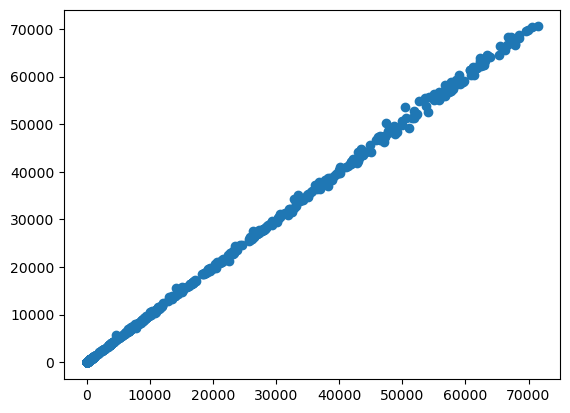

In [482]:
plt.scatter(Y_Test,Y_Pred)

In [483]:
data=pd.DataFrame(Y_Test)
data['Predictions']=Y_Pred

In [484]:
data.sort_index(inplace=True)
data

,Close,Predictions
Start,,
2010-11-20,0.2830,5.687890
2010-11-24,0.2830,-8.086154
2010-11-29,0.2299,-27.196708
2010-12-01,0.2275,-14.521176
2010-12-05,0.1900,-19.520064
...,...,...
2024-08-05,54006.0000,52622.748388
2024-08-07,55024.1100,56367.866602
2024-08-18,58525.9500,59330.548031


In [485]:
# Evaluate
mae = mean_absolute_error(Y_Test, Y_Pred)
rmse = np.sqrt(mean_squared_error(Y_Test, Y_Pred))
print("Mean Squared Error: ", mean_squared_error(Y_Test,Y_Pred))
print(f"Root Mean Squared Error: {rmse:.2f} USD")
print("R2 Score: ", r2_score(Y_Test,Y_Pred))
print(f"Mean Absolute Error: {mae:.2f} USD")

Mean Squared Error:  112902.82678383849
Root Mean Squared Error: 336.01 USD
R2 Score:  0.9996598578602534
Mean Absolute Error: 136.75 USD


# Deep learning(LSTM)

In [487]:
####################################################################################################################

In [488]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [489]:
df

,End,Open,High,Low,Close,Volume,Market Cap,Volatility,Close_Lag1,Monthly_Return,...,7DMA,14DMA,1D_Lag,7D_Lag,ON,SS,SO,FI,TE,TT
Start,,,,,,,,,,,,,,,,,,,,,
2010-11-12,2010-11-13,0.2682,0.2682,0.2682,0.2682,0.000000e+00,1.222556e+06,0.066643,0.2231,1.554286,...,0.273471,0.241293,0.2231,0.260,0.2682,0.26820,0.26820,0.2682,0.26820,0.26820
2010-11-13,2010-11-14,0.2760,0.2760,0.2760,0.2760,0.000000e+00,1.258112e+06,0.043240,0.2682,1.705882,...,0.257186,0.246800,0.2682,0.390,0.2760,0.27600,0.27600,0.2760,0.27600,0.27600
2010-11-14,2010-11-15,0.2790,0.2790,0.2790,0.2790,0.000000e+00,1.275460e+06,0.026785,0.2760,1.657143,...,0.248471,0.252979,0.2760,0.340,0.2790,0.27900,0.27900,0.2790,0.27900,0.27900
2010-11-15,2010-11-16,0.2682,0.2682,0.2682,0.2682,0.000000e+00,1.230146e+06,0.027608,0.2790,1.655446,...,0.252071,0.258171,0.2790,0.243,0.2682,0.26820,0.26820,0.2682,0.26820,0.26820
2010-11-16,2010-11-17,0.2230,0.2230,0.2230,0.2230,0.000000e+00,1.022829e+06,0.024577,0.2682,1.186275,...,0.253929,0.260257,0.2682,0.210,0.2230,0.22300,0.22300,0.2230,0.22300,0.22300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-18,2024-08-19,59479.0400,60212.2800,58525.9500,58525.9500,8.065593e+10,1.177540e+12,913.629037,59420.0300,-0.121865,...,59012.291429,58605.757143,59420.0300,58819.990,60212.2800,59814.30612,59568.10194,59369.1150,59170.12806,58923.92388
2024-08-19,2024-08-20,58320.0200,59562.7100,57928.8600,59562.7100,9.317886e+10,1.157510e+12,930.554499,58525.9500,-0.113419,...,59043.818571,59002.665000,58525.9500,59342.020,59562.7100,59177.12140,58938.57930,58745.7850,58552.99070,58314.44860
2024-08-20,2024-08-21,59448.0000,61315.9600,58705.6800,59056.0100,1.036200e+11,1.185950e+12,652.740126,59562.7100,-0.132448,...,58828.247143,59222.234286,59562.7100,60565.010,61315.9600,60699.93392,60318.83304,60010.8200,59702.80696,59321.70608


In [490]:
for i in halving_dates:
    print(i)

2012-11-28 00:00:00
2016-07-09 00:00:00
2020-05-11 00:00:00
2024-04-29 00:00:00


In [491]:
MASK= (bitcoin_df['End'] >= halving_dates[2]) & (bitcoin_df['End'] <= halving_dates[3])
dff= bitcoin_df.loc[MASK]
dff

,End,Open,High,Low,Close,Volume,Market Cap,Volatility,Close_Lag1,Monthly_Return,...,7DMA,14DMA,1D_Lag,7D_Lag,ON,SS,SO,FI,TE,TT
Start,,,,,,,,,,,,,,,,,,,,,
2020-05-10,2020-05-11,9554.216377,9554.216377,8388.959555,8745.152545,4.909643e+10,1.598260e+11,482.061707,9570.005988,0.274834,...,9307.958090,8910.428904,9570.005988,8894.362675,9554.216377,9279.215767,9109.088271,8971.587966,8834.087661,8663.960165
2020-05-11,2020-05-12,8747.339336,9108.035700,8303.339059,8593.856494,4.355150e+10,1.599160e+11,534.157360,8745.152545,0.251001,...,9266.608049,8969.512242,8745.152545,8883.306781,9108.035700,8918.127293,8800.641583,8705.687379,8610.733176,8493.247466
2020-05-12,2020-05-13,8583.604045,8940.956452,8566.733028,8792.063768,4.426970e+10,1.610570e+11,554.308402,8593.856494,0.260108,...,9241.474630,9043.643767,8593.856494,8967.997704,8940.956452,8852.639724,8798.003104,8753.844740,8709.686376,8655.049756
2020-05-13,2020-05-14,8804.984468,9363.647602,8804.984468,9302.896541,3.461099e+10,1.659090e+11,554.359542,8792.063768,0.360585,...,9256.423750,9082.437149,8792.063768,9198.252701,9363.647602,9231.803102,9150.238285,9084.316035,9018.393785,8936.828968
2020-05-14,2020-05-15,9298.001842,9836.468003,9273.449891,9772.561576,4.496375e+10,1.756800e+11,516.128567,9302.896541,0.425366,...,9228.488934,9165.667988,9302.896541,9968.105282,9836.468003,9703.595729,9621.395084,9554.958947,9488.522810,9406.322165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,2024-04-25,66414.010000,67070.400000,63742.730000,64291.070000,1.384910e+11,1.294530e+12,1246.155647,66386.610000,-0.080268,...,64947.911429,65020.085000,66386.610000,61309.970000,67070.400000,66285.069880,65799.230060,65406.565000,65013.899940,64528.060120
2024-04-25,2024-04-26,64289.600000,65083.980000,62956.040000,64495.270000,1.491580e+11,1.264230e+12,1081.348804,64291.070000,-0.079428,...,65101.807143,64618.886429,64291.070000,63418.000000,65083.980000,64581.786160,64271.106920,64020.010000,63768.913080,63458.233840
2024-04-26,2024-04-27,64486.530000,64732.290000,63397.370000,63806.230000,1.445520e+11,1.263020e+12,1110.600119,64495.270000,-0.082319,...,65078.990000,64375.887857,64495.270000,63965.950000,64732.290000,64417.248880,64222.350560,64064.830000,63907.309440,63712.411120


In [492]:
df=dff

In [493]:
data=DF.filter(['Close'])
DATA=df.filter(['Close'])
#convert data to a numpy array
dataset=DATA.values
#getting number of rows to train the model
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1160

In [494]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00234589],
       [0.        ],
       [0.00307326],
       ...,
       [0.85608419],
       [0.85107442],
       [0.84450204]])

In [496]:
num=50

In [497]:
#creating training data set
#create scaled training data set
trained_data=scaled_data[0:training_data_len,:]
#split the data into x_train and Y_train
x_train=[]
y_train=[]

for i in range(num,len(trained_data)):
    x_train.append(trained_data[i-num:i,0])
    y_train.append(trained_data[i,0])

In [499]:
#change the x and y train data to a numpy array
x_train=np.array(x_train)
y_train=np.array(y_train)


In [500]:
#change our x_train data to 3D now its only 2D 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1110, 50, 1)

In [501]:
# build the LSTM model
Model=Sequential()
Model.add(LSTM(500,return_sequences=True,input_shape=(x_train.shape[1],1)))
Model.add(LSTM(500,return_sequences=False))
Model.add(Dense(25))
Model.add(Dense(1))

In [502]:
# compile the model
Model.compile(optimizer='adam',loss='mean_squared_error')

In [570]:
Model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - loss: 0.0035
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 0.0018
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 0.0014
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 0.0013
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - loss: 0.0014
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.0015
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - loss: 0.0012
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 0.0011
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - loss: 0.0017
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - loss: 0.0012


In [504]:
Model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50, 500)        │     1,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 500)            │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │        12,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,055,655 (34.54 MB)

 Trainable params: 3,018,551 (11.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,037,104 (23.03 MB)

In [577]:
#create testing dataset
#create a numpy array containing the scaled data 
test_data=scaled_data[training_data_len-num:,:]

#create data set x_test and Y_test
x_test=[]
y_test=dataset[80,:]
for i in range(num,len(test_data)):
    x_test.append((test_data[i-num:i,0]))

In [579]:
#convert data to numpy array
x_test=np.array(x_test)

In [581]:
#reshape to 3d
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [583]:
x_test.shape

(290, 50, 1)

In [585]:
#get the model predicted values
predictions=Model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step


In [586]:
#getting RSME(root square mean error)
rsme=np.sqrt(np.mean(predictions-y_test)**2)
rsme

30137.762094407328

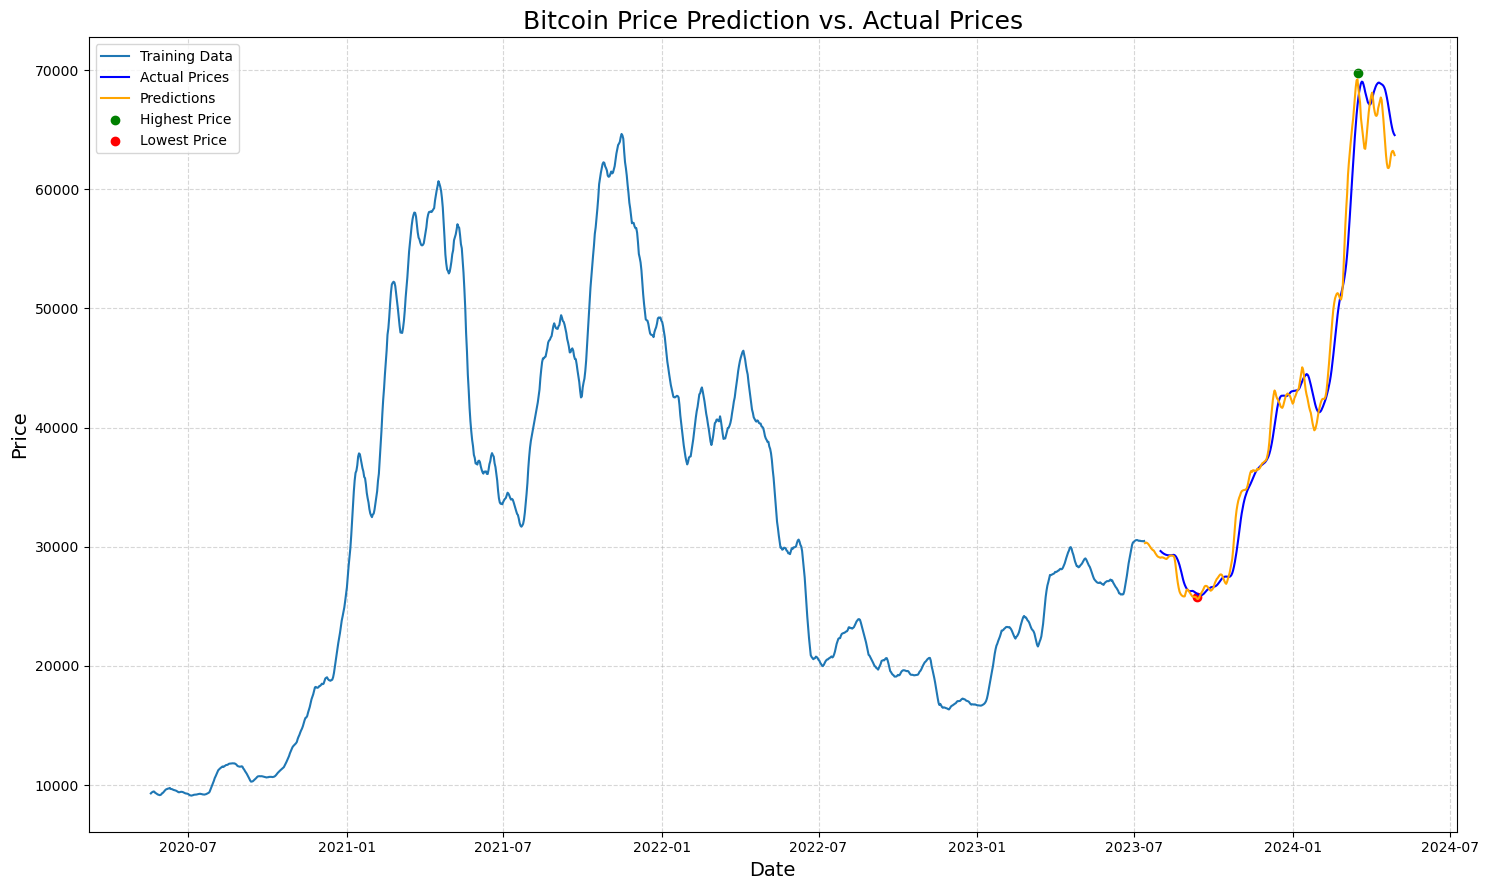

In [589]:
# Plot our model
train = DATA[:training_data_len].rolling(window=10).mean()
valid = DATA[training_data_len:].rolling(window=10).mean()
valid['predictions'] = predictions

# Create a new figure
plt.figure(figsize=(15, 9))

# Plot training data
plt.plot(train['Close'], label='Training Data')

# Plot validation data and predictions
plt.plot(valid['Close'].rolling(window=10).mean(), label='Actual Prices', color='blue')
plt.plot(valid['predictions'], label='Predictions', color='orange')

# Highlight highest and lowest points
max_price = valid['Close'].max()
min_price = valid['Close'].min()
plt.scatter(valid.index[valid['Close'] == max_price], max_price, color='green', marker='o',label='Highest Price')                                            
plt.scatter(valid.index[valid['Close'] == min_price], min_price, color='red', marker='o',label='Lowest Price')                                            

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set labels and title
plt.xlabel("Date", fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Bitcoin Price Prediction vs. Actual Prices', fontsize=18)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [590]:
nulll=valid.isnull()
nulll.count()

Close          290
predictions    290
dtype: int64

In [593]:
new_df=DATA[1:]
new_df

,Close
Start,
2020-05-11,8593.856494
2020-05-12,8792.063768
2020-05-13,9302.896541
2020-05-14,9772.561576
2020-05-15,9293.972171
...,...
2024-04-24,64291.070000
2024-04-25,64495.270000
2024-04-26,63806.230000


In [613]:
date_pred=data[-2:-1]
date_pred

,Close
Start,
2024-08-21,61109.99


In [615]:
val=(date_pred['Close'])
val

Start
2024-08-21    61109.99
Name: Close, dtype: float64

In [617]:
# get data for last 1000 days and convert it to an array
last_1000_days=new_df[-1000:].values
# scale the date to values btw 0 and 1
last_1000_days_scaled=scaler.transform(last_1000_days)
# create an empty list
X_test=[]
#append scaled data to the x_test
X_test.append(last_1000_days_scaled)
#convert X_test to a numpy array
X_test=np.array(X_test)
#reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
price_predict_scaled=Model.predict(X_test)
#get the unscaled predicted data
predicted_price=scaler.inverse_transform(price_predict_scaled)
pred=predicted_price[0]
eror=pred- int(val.iloc[0])
result_df=date_pred
result_df.loc[:,'Prediction'] = pred
result_df.loc[:,'Error'] = eror
result_df
                

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,Close,Prediction,Error
Start,,,
2024-08-21,61109.99,62544.652344,1435.652344
